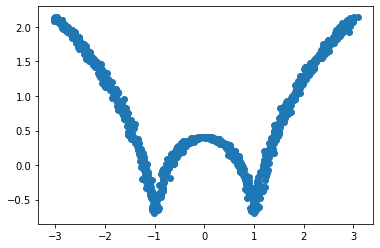

In [2]:
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(-3,3,1000)
y=np.log(np.abs((x**2)-1)+0.5)
x+=np.random.normal(scale=0.05,size=1000)
plt.scatter(x,y)

<module 'matplotlib.pyplot' from '/home/shobhit/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

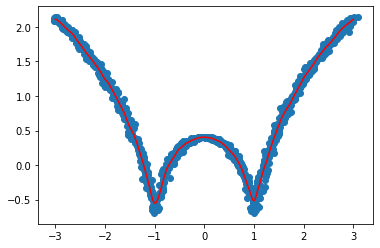

In [4]:
def local_reg(x0,x,y,tau):
    # add bias term
    x0 = np.r_[1, x0]
    x = np.c_[np.ones(len(x)), x]
    
    # fit model: normal equations with kernel
    xw = x.T * radial_kernel(x0, x, tau)
    beta = np.linalg.pinv(xw @ x) @ xw @ y
    
    # predict value
    return x0 @ beta


def radial_kernel(x0, x, tau):
    return np.exp(np.sum((x - x0) ** 2, axis=1) / (-2 * tau * tau))
def plot_lwr(tau):
    # prediction
    domain = np.linspace(-3, 3, num=300)
    prediction = [local_reg(x0, x, y, tau) for x0 in domain]
    plt.scatter(x,y)
    plt.plot(domain, prediction, color='red')
    return plt
plot_lwr(0.04)